In [1]:
import os
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from core import aggregate_daily_data
from core import plot_utils

# Data manips

In [2]:
df_daily = pd.read_csv(os.path.join('.', 'Assessment Data_Daily.csv'))
print(f"shape daily data: {df_daily.shape}")
df_daily.head()

shape daily data: (578, 20)


,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,First Published,Last Updated,Pre-Scoping Discussion Meeting,Program Area,Remediation Plan Due,System Acronym,ATO/IATO Expiration Date (IACS),Portfolio,Program Office (IACS),Last Assessment
0,LSCA,NaN,Requesting assessment slot in September. Imple...,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,7/29/20 6:25,8/12/20 16:14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,LSCA,NaN,20-0819(HML): System used for a few years by O...,Awaiting Readiness Date,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 10:52,8/19/20 10:52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SCA,NaN,20-0819 (HML): New system being procured by RMD.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 10:55,1/19/21 15:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRA,NaN,20-0819(HML): schedule Q3 or Q4,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 16:11,8/19/20 16:11,NaN,NaN,NaN,NaN,4/21/22,OCIO,OCIO - Office of the Chief Information Officer,6/29/20
4,TRA,NaN,20-0819(HML): schedule Q3 or Q4 FY22,Add to schedule,NaN,NaN,NaN,NaN,NaN,NaN,8/19/20 16:11,8/19/20 16:11,NaN,NaN,NaN,NaN,4/21/22,OCIO,OCIO - Office of the Chief Information Officer,6/29/20


In [3]:
df_daily = aggregate_daily_data.clean_rows_helper(df_daily)
df_daily = aggregate_daily_data.create_date_columns_helper(df_daily)
df_daily = aggregate_daily_data.one_hot_encode_assessment_helper(df_daily)
df_daily_full = df_daily 
df_daily = aggregate_daily_data.subset_data_by_schedule_status_helper(df_daily)
print(f"shape daily data: {df_daily.shape}")
df_daily.head()

shape daily data: (201, 32)


,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,...,Year,Month,Day,Date,ATT,LSCA,OA,SCA,TRA,total_assessments_computed
0,OA,10/3/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,10,1,2017-10-01,0,0,1,0,0,1
1,SCA,10/16/17,NaN,Completed,NaN,NaN,NaN,No,10/30/17,11/1/17,...,2017,10,1,2017-10-01,0,0,0,1,0,1
2,OA,11/21/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,11,1,2017-11-01,0,0,1,0,0,1
3,SCA,12/4/17,NaN,Completed,NaN,NaN,NaN,No,12/18/17,12/20/17,...,2017,12,1,2017-12-01,0,0,0,1,0,1
4,OA,12/19/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,12,1,2017-12-01,0,0,1,0,0,1


## Total assessments by month

In [4]:
monthly_data = aggregate_daily_data.create_monthly_aggregate_from_daily_data_helper(df_daily)
monthly_data.tail()

,ATT,LSCA,OA,SCA,TRA,total_assessments_computed
Date,,,,,,
2021-06-01,0,0,0,5,0,5
2021-07-01,0,1,8,1,0,10
2021-10-01,0,0,0,1,0,1
2021-11-01,0,0,0,1,0,1
2022-10-01,0,0,0,1,0,1


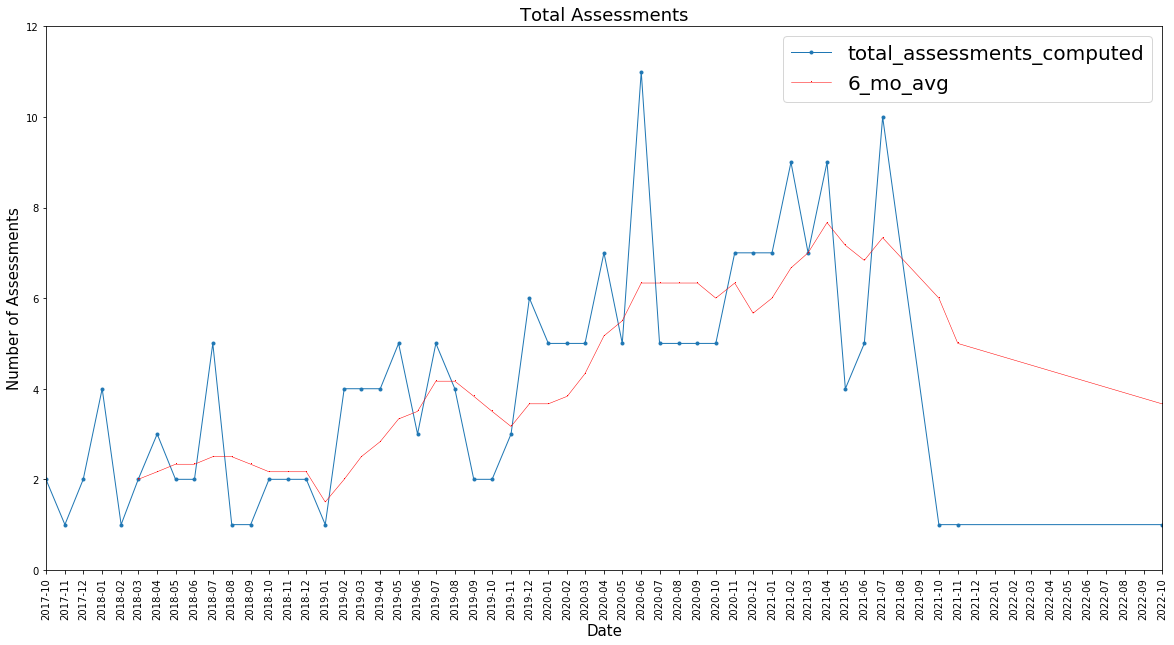

In [5]:
plt.figure(figsize=(20,10))
ax = monthly_data['total_assessments_computed'].plot(marker = '.', linewidth=1)
MOVING_AVG_WINDOW = 6
monthly_data['6_mo_avg'] = (monthly_data['total_assessments_computed'].
                              rolling(window=MOVING_AVG_WINDOW).mean())
ax2 = monthly_data['6_mo_avg'].plot(marker = ",", linewidth=0.5, color = "red")
plt.ylabel('Number of Assessments', size=15)
plt.xlabel("Date", size=15)
plt.title('Total Assessments', size=18)
plt.xticks(rotation=90)
ax.set_ylim([0, 12])
ax.set_xlim([min(monthly_data.index), max(monthly_data.index)])
plt.legend(fontsize=20)
# Major ticks every month.
formatter = mdates.DateFormatter("%Y-%m") ### formatter of the date
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)

## Assessment Type by Month

In [6]:
assessment_type_by_month = monthly_data[["ATT","LSCA","OA","SCA","TRA"]]
assessment_type_by_month.head()

,ATT,LSCA,OA,SCA,TRA
Date,,,,,
2017-10-01,0,0,1,1,0
2017-11-01,0,0,1,0,0
2017-12-01,0,0,1,1,0
2018-01-01,0,0,3,1,0
2018-02-01,0,0,0,1,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text xticklabel objects>)

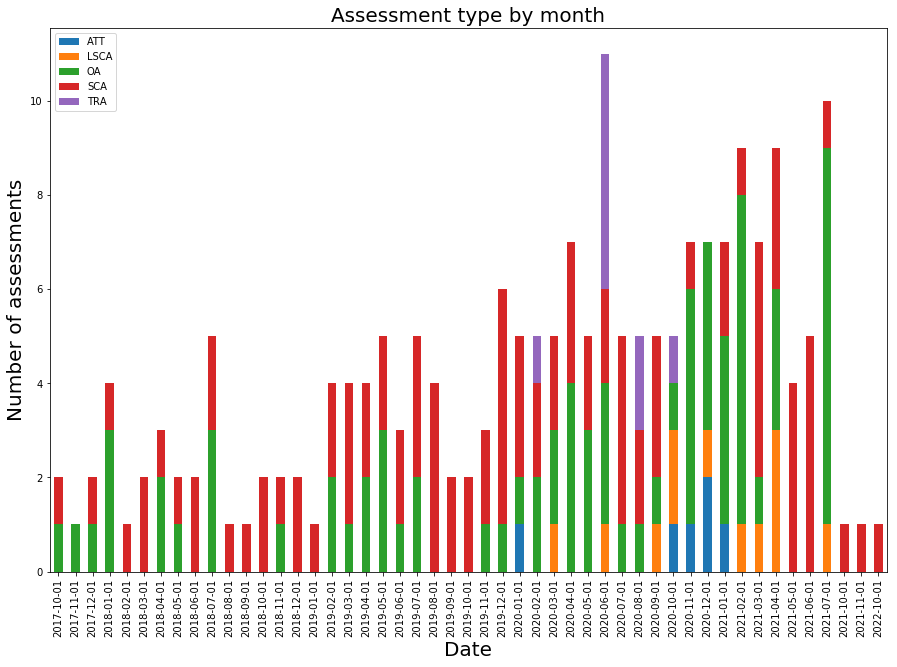

In [7]:
mpl.rcParams['figure.figsize'] = (15,10)
assessment_type_by_month.plot(kind='bar', stacked=True)
plt.ylabel("Number of assessments", size=20)
plt.xlabel("Date", size=20)
plt.title("Assessment type by month", size=20)
plt.xticks(rotation=90)

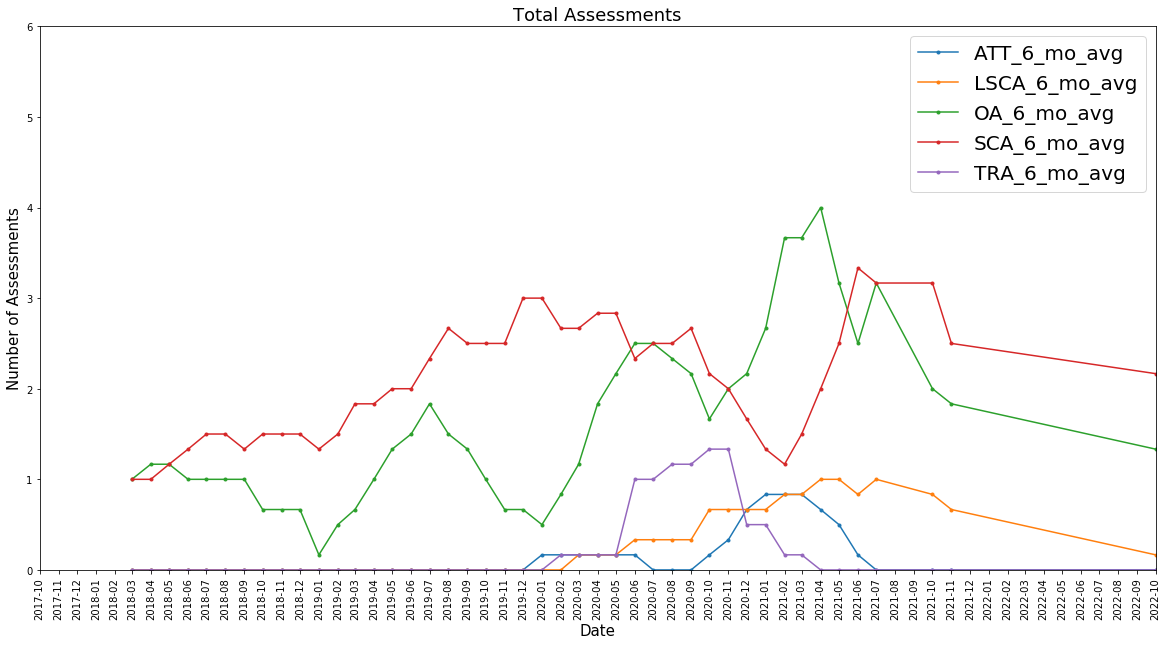

In [8]:
plt.figure(figsize=(20,10))

for assessment_type in ['ATT', 'LSCA', 'OA', 'SCA', 'TRA']:
    new_col_name = assessment_type + '_6_mo_avg'
    
    monthly_data[new_col_name] = (monthly_data[assessment_type].
                                  rolling(window=MOVING_AVG_WINDOW).mean())
    ax = monthly_data[new_col_name].plot(marker = ".", linewidth=1.5)

plt.ylabel('Number of Assessments', size=15)
plt.xlabel("Date", size=15)
plt.title('Total Assessments', size=18)
plt.xticks(rotation=90)
ax.set_ylim([0, 6])
ax.set_xlim([min(monthly_data.index), max(monthly_data.index)])
plt.legend(fontsize=20)
# Major ticks every month.
formatter = mdates.DateFormatter("%Y-%m") ### formatter of the date
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter) ## calling the formatter for the x-axis
ax.xaxis.set_major_locator(locator)

## Daily data (all schedule statuses)

In [9]:
print(df_daily_full.shape)
df_daily_full.head()

(326, 32)


,Assessment Type,Assessment Kick-Off Date,Assessment Schedule Notes,Assessment Schedule Status,Assessor(s),Assessment Documents,Assessment Estimated Completion Date,Assessment in the Next 90 Days?,Assessment Outbrief,Assessment Report Due,...,Year,Month,Day,Date,ATT,LSCA,OA,SCA,TRA,total_assessments_computed
0,OA,10/3/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,10,1,2017-10-01,0,0,1,0,0,1
1,SCA,10/16/17,NaN,Completed,NaN,NaN,NaN,No,10/30/17,11/1/17,...,2017,10,1,2017-10-01,0,0,0,1,0,1
2,OA,11/21/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,11,1,2017-11-01,0,0,1,0,0,1
3,SCA,12/4/17,NaN,Completed,NaN,NaN,NaN,No,12/18/17,12/20/17,...,2017,12,1,2017-12-01,0,0,0,1,0,1
4,OA,12/19/17,NaN,Completed,NaN,NaN,NaN,No,NaN,NaN,...,2017,12,1,2017-12-01,0,0,1,0,0,1


          Assessment Schedule Status  count
0                    Add to schedule    116
1            Awaiting Readiness Date      1
2                          Completed    169
3                        In Progress      7
4  Report Signed, Pending RTM Upload      1
5                          Scheduled     25


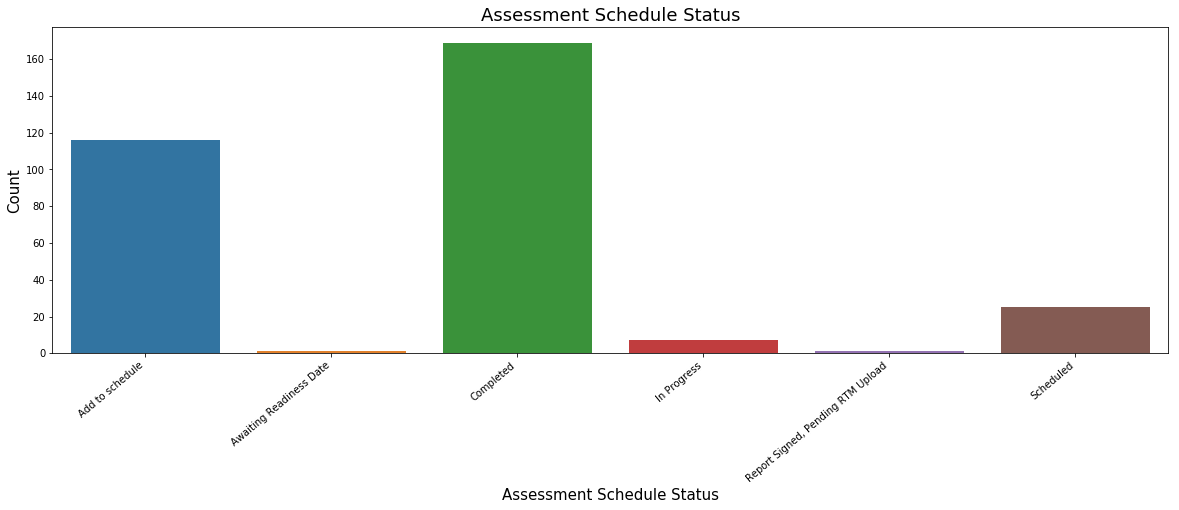

In [10]:
schedule_status_counts = plot_utils.create_count_data(df_daily_full, 'Assessment Schedule Status')
print(schedule_status_counts)
plot_utils.create_barplot(schedule_status_counts,
                          'Assessment Schedule Status',
                          'count', 'Assessment Schedule Status')

In [11]:
status_by_date = df_daily_full.groupby('Date')['Assessment Schedule Status'].value_counts().unstack()
status_by_date.fillna(0, inplace=True)
status_by_date.head()

Assessment Schedule Status,Add to schedule,Awaiting Readiness Date,Completed,In Progress,"Report Signed, Pending RTM Upload",Scheduled
Date,,,,,,
2017-10-01,0.0,0.0,2.0,0.0,0.0,0.0
2017-11-01,0.0,0.0,1.0,0.0,0.0,0.0
2017-12-01,0.0,0.0,2.0,0.0,0.0,0.0
2018-01-01,0.0,0.0,4.0,0.0,0.0,0.0
2018-02-01,0.0,0.0,1.0,0.0,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91]),
 <a list of 92 Text xticklabel objects>)

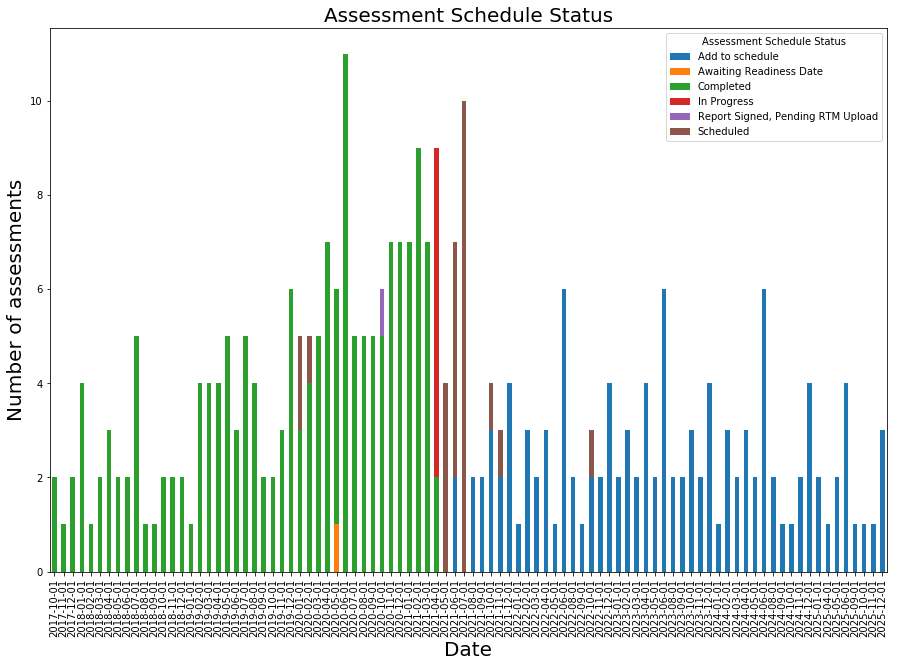

In [12]:
mpl.rcParams['figure.figsize'] = (15,10)
status_by_date.plot(kind='bar', stacked=True)
plt.ylabel("Number of assessments", size=20)
plt.xlabel("Date", size=20)
plt.title("Assessment Schedule Status", size=20)
plt.xticks(rotation=90)